# Detect structure in quasicrystal patterns

To show complex graphics, you may need to strat Jupyter with this command

    jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [95]:
%matplotlib inline

from numpy import *
from matplotlib.pylab import *
import scipy
import scipy.spatial
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
from neurotools.plot import *
import neurotools.plot
from neurotools.nlab import *
plt.set_cmap('viridis')

# Render quasicrystal as sum of plane waves

In [96]:
K  = 300  # frequency of waves. Higher = more
N  = 1000 # size of domain for rasterizing
M  = 11   # number of waves

# Generate grid
x  = linspace(-1,1,N)
y  = linspace(-1,1,N)
xy = x[:,None] + 1j*y[None,:]

(1+0j)
(0.959492973614+0.281732556841j)
(0.841253532831+0.540640817456j)
(0.654860733945+0.755749574354j)
(0.415415013002+0.909631995355j)
(0.142314838273+0.989821441881j)
(-0.142314838273+0.989821441881j)
(-0.415415013002+0.909631995355j)
(-0.654860733945+0.755749574354j)
(-0.841253532831+0.540640817456j)
(-0.959492973614+0.281732556841j)


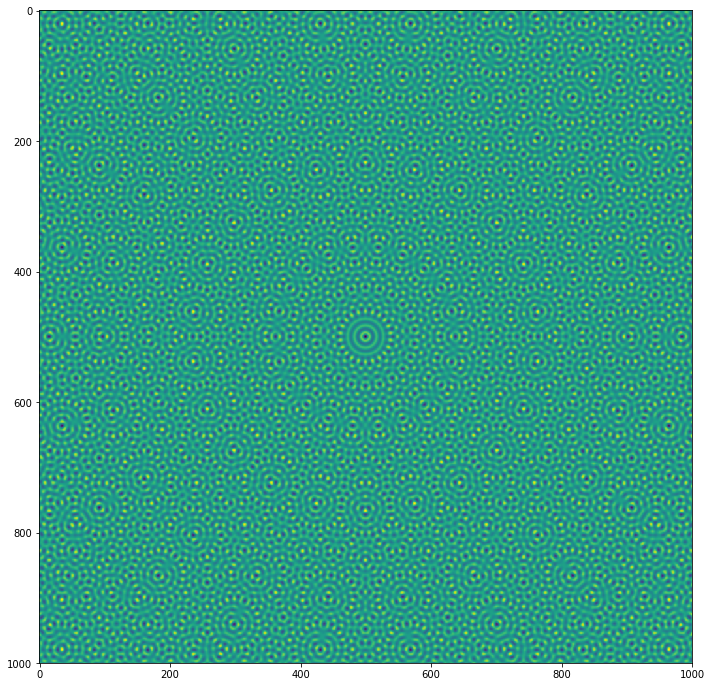

In [97]:
phases = ones(M)*pi*0
rotation = exp(linspace(0,pi,M+1)[:M]*1j)
xyr = array(xy)*0
qqphases = []
for p,rr in zip(phases,rotation):
    print(rr)
    phase = real(xy*rr)*K+p
    xyr += cos(phase)
    qqphases.append(array(phase))
qq = xyr#-xyr**2
qq = real(-qq)
#subplot(131)
imshow(qq)

# Region similarity based on phase vector model

Translation in the quasicrystal is equivalent to applying local phase shifts. The vector of phases of each wave at a point describes the local neighborhood at that point. The phases wrap circularlly on the ring $[0,2\pi)$, and shifts in $(x,y)$ apply (correlated) shifts to the phase vectors.

I wonder whether we can use this to find and trace cool structures in the crystal?

In [98]:
qqphases = array(qqphases)%(2*pi)
print(qqphases.shape,qqphases.dtype)

(11, 1000, 1000) float64


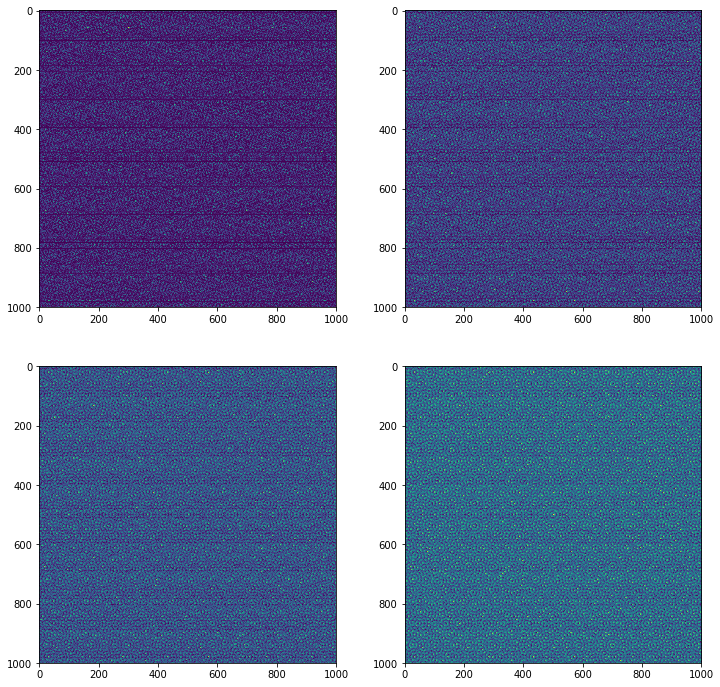

In [99]:
ordered = numpy.sort(qqphases,axis=0)

subplot(221)
imshow(ordered[0])
subplot(222)
imshow(ordered[1])
subplot(223)
imshow(ordered[2])
subplot(224)
imshow(ordered[3])

# or could try this

In [100]:
# all pairwise angles? Will form a weird manifold. Hmm

angles = exp(1j*qqphases)

In [101]:
angles.shape

(11, 1000, 1000)

In [102]:
dotprod = (angles[None,...]*conj(angles[:,None,...]))
featurevec = dotprod.reshape((M*M,N*N))

In [103]:
w,v=pca(featurevec.T,n_keep=(M*(M+1)//2))

In [104]:
pca

<function neurotools.stats.stats.pca>

In [105]:
projection = (v.T.dot(featurevec))

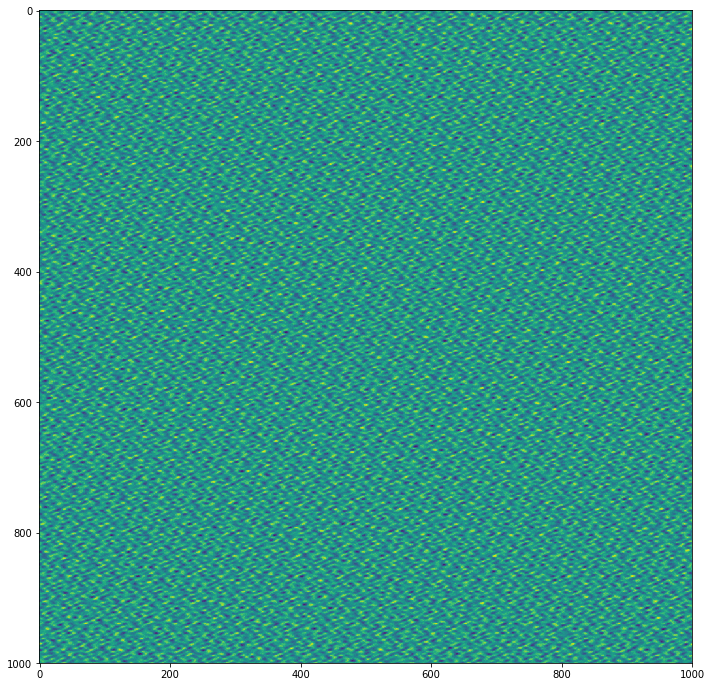

In [106]:
imshow(real(projection[-2].reshape((N,N))))

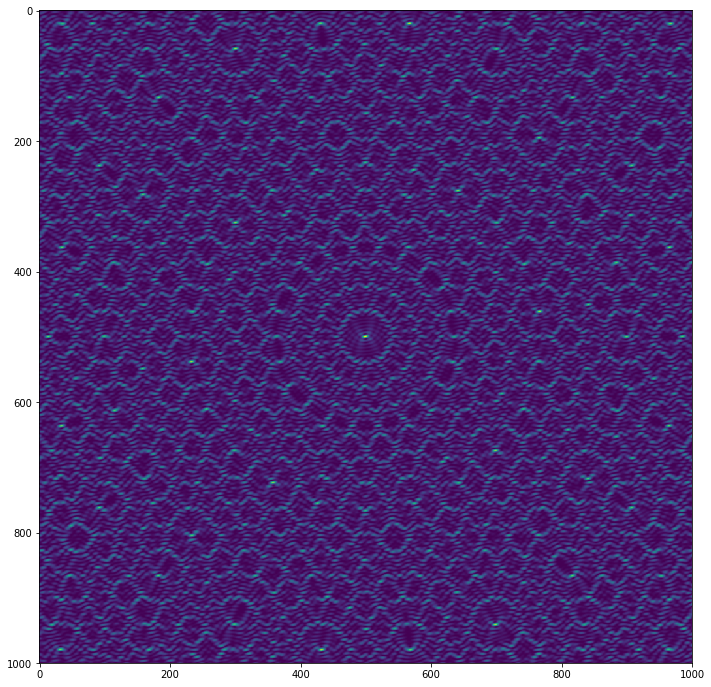

In [107]:
imshow(abs(featurevec.sum(axis=0)).reshape((N,N)))

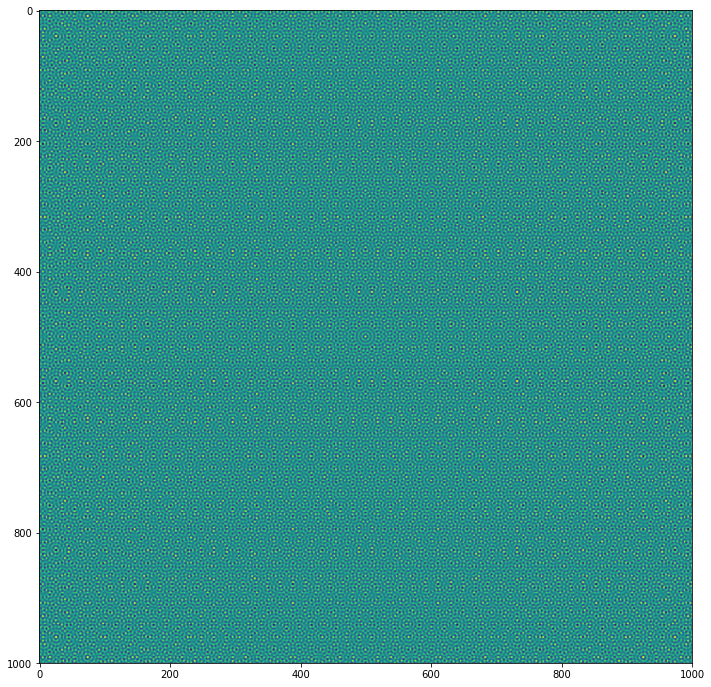

In [108]:
imshow((real(angles)**2).sum(axis=0));

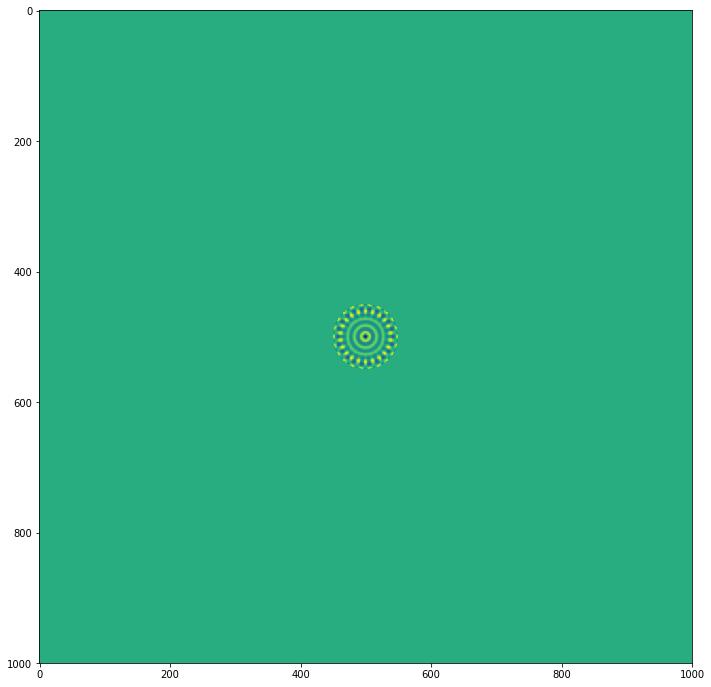

In [122]:
sigma = 0.1
mask = exp(-0.5*abs(xy)**2/sigma**2)
mask = abs(xy)<0.1
imshow(mask*qq)

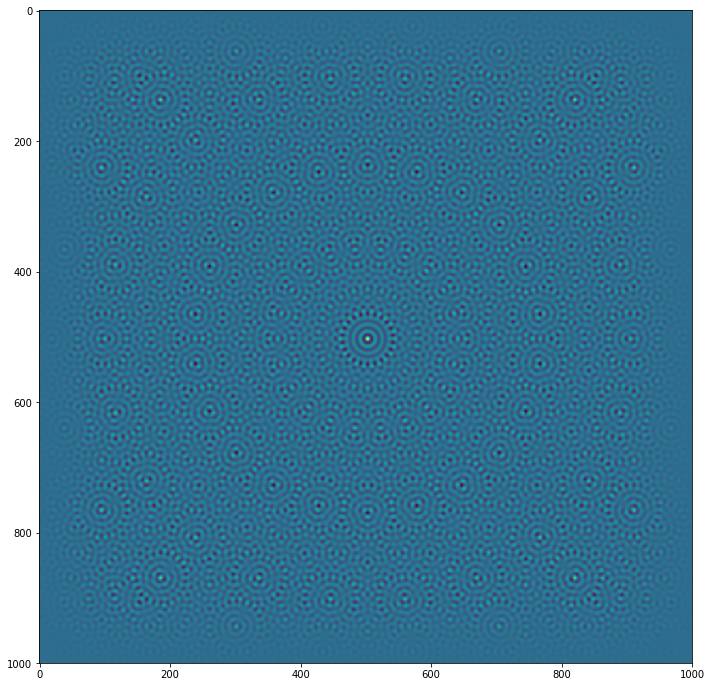

In [130]:
rr = scipy.signal.fftconvolve(qq*mask,qq**3,mode='same');
rr = scipy.signal.fftconvolve(rr*mask,rr**3,mode='same');
rr = scipy.signal.fftconvolve(rr*mask,rr**3,mode='same');
imshow(rr)